# Notebook Description

This notebook is concerned with producing maps of the rainfall trends in the MJO phases (1-8) and the MJO subphases (enhanced, suppressed ect.).
<br>
This is done in the following order:
<ol>
    <li> AWAP and RMM data is loaded in. </li>
    <li> Data from start of year is moved to previous year, making resampling work for individual years.</li>
    <li> Data is split into different MJO phases (1-8). </li>
    <li> Indices (count and sum) are calculated for data. </li>
    <li> Phases are then compbined together to subphases.</li>
    <li> Trends then calculated for subphases.</li>
    
</ol>

# Packages

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dask.array
import os
import cartopy.crs as ccrs
import matplotlib.colors as colors
import datetime as dt
from matplotlib.colors import BoundaryNorm
rb = plt.cm.RdBu
bm = plt.cm.Blues
best_blue = '#9bc2d5'
recherche_red = '#fbc4aa'
wondeful_white = '#f8f8f7'
import glob
import pdb
import constants
import warnings
warnings.filterwarnings('ignore')
import calculation_functions
import matplotlib.gridspec as gridspec

In [2]:
import sys
from importlib import reload
sys.path.append('')

# This is for loading in all the data sets that have been used in this study.
import load_dataset as load

# For splitting all of the data sets into the different phases.
import phase_calc_functions as phase_calc

# Collection of functions for plotting MJO phases.
import phase_plot_functions as phase_plot
import miscellaneous#apply_masks

In [3]:
image_dir = '/g/data/w40/ab2313/images/mjo_and_rainfall_trend_images/'

# Data

In [140]:
# Loading awap
awap = load.load_awap()
awap_ws = phase_calc.wet_season_year(awap)

# Loading RMM
rmm = load.load_rmm()
rmm_ws = phase_calc.wet_season_year(rmm)

awap_ws, rmm_ws = calculation_functions.match_dataset_time(awap_ws, rmm_ws)

awap_ws = miscellaneous.apply_masks(awap_ws)

New datasets are now of lenght d1 = 5578 and d2 = 5578


# Calculation

In [141]:
# Splitting AWAP into the the different phases of the Wheeler and Hendon MJO
awap_split_ws = phase_calc.split_into_1to8(awap_ws, rmm_ws)

In [142]:
ex_piece = ''

In [143]:
awap_sum = calculation_functions.resample_sum(awap_split_ws)
awap_sum_sub = phase_calc.resample_phase_to_subphase(awap_sum)

awap_sum_sub

<xarray.Dataset>
Dimensions:  (lat: 80, lon: 161, phase: 4, year: 46)
Coordinates:
  * lat      (lat) float64 -30.0 -29.75 -29.5 -29.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * year     (year) int64 1975 1976 1977 1978 1979 ... 2016 2017 2018 2019 2020
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
Data variables:
    precip   (phase, year, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

In [144]:
awap_count = calculation_functions.resample_count(awap_split_ws)
awap_count_sub = phase_calc.resample_phase_to_subphase(awap_count)

awap_count_sub

<xarray.Dataset>
Dimensions:  (lat: 80, lon: 161, phase: 4, year: 46)
Coordinates:
  * lat      (lat) float64 -30.0 -29.75 -29.5 -29.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * year     (year) int64 1975 1976 1977 1978 1979 ... 2016 2017 2018 2019 2020
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
Data variables:
    precip   (phase, year, lat, lon) int64 0 0 0 0 0 0 3 4 3 ... 0 0 0 0 0 0 0 0

In [145]:
# # Resampling: getting the number of raindays each year (each year is a wet season).
# awap_count = awap_split_ws.resample(time = 'y').count(dim = 'time')

# # The index needs to be changed to just the year. Other wise it will be the full date.
# awap_count['time'] = awap_count.time.dt.year
# awap_count = awap_count.rename({'time':'year'})
# awap_count_sub = phase_calc.resample_phase_to_subphase(awap_count)

In [146]:
trend_count_sub, trend_sig_count_sub, trend_percent_count_sub, trend_percent_sig_count_sub = \
    phase_calc.return_alltrendinfo_custom(awap_count_sub.precip)

data
<xarray.DataArray 'precip' (phase: 4, year: 46, lat: 80, lon: 161)>
array([[[[ 0,  0,  0, ..., 11,  0,  0],
         [ 0,  0,  0, ..., 12, 13,  0],
         [ 0,  0,  0, ..., 12, 10,  0],
         ...,
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0]],

        [[ 0,  0,  0, ..., 17,  0,  0],
         [ 0,  0,  0, ..., 16, 17,  0],
         [ 0,  0,  0, ..., 16, 14,  0],
         ...,
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0]],

        [[ 0,  0,  0, ..., 11,  0,  0],
         [ 0,  0,  0, ..., 11, 13,  0],
         [ 0,  0,  0, ..., 13, 13,  0],
         ...,
...
         ...,
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0]],

        [[ 0,  0,  0, ...,  9,  0,  0],
         [ 0,  0,  0, ...,  8,  9,  0],
         [ 0,  0,  0, ...,  6,  8,  0],
         ...,
       

In [147]:
trend_count_sub_norm, trend_sig_count_sub_norm, trend_percent_count_sub_norm, trend_percent_sig_count_sub_norm = \
    phase_calc.return_alltrendinfo_custom(awap_count_sub.precip, normalise = 'subphase')

renaming time to year.
data
<xarray.DataArray (phase: 4, year: 46, lat: 80, lon: 161)>
array([[[[0.        , 0.        , 0.        , ..., 0.52380952,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.57142857,
          0.61904762, 0.        ],
         [0.        , 0.        , 0.        , ..., 0.57142857,
          0.47619048, 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.60714286,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.57142857,
          0.60714286, 0.        ],
         [0.        , 0.        , 0.        , ..., 0.57142857,
          0.5       , 0.        ],
...
         [0

In [148]:
phase_calc = reload(phase_calc)
trend_sum_sub, trend_sig_sum_sub, trend_percent_sum_sub, trend_percent_sig_sum_sub = \
    phase_calc.return_alltrendinfo_custom(awap_sum_sub.precip)

phase_calc = reload(phase_calc)
trend_sum_sub_norm, trend_sig_sum_sub_norm, trend_percent_sum_sub_norm, trend_percent_sig_sum_sub_norm = \
    phase_calc.return_alltrendinfo_custom(awap_sum_sub.precip, normalise = 'subphase')



data
<xarray.DataArray 'precip' (phase: 4, year: 46, lat: 80, lon: 161)>
array([[[[  0.        ,   0.        ,   0.        , ...,  74.51210734,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,  73.16977333,
           64.0974518 ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,  71.4598687 ,
           69.08600262,   0.        ],
         ...,
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ]],

        [[  0.        ,   0.        ,   0.        , ..., 253.97192255,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ..., 196.18399974,
          208.2239307 ,   0.        ],
         [  0.        ,   0.   

In [150]:
awap_sum_sub_norm = phase_calc.normalise_trend(awap_sum_sub.precip, normalise = 'subphase')
awap_count_sub_norm = phase_calc.normalise_trend(awap_count_sub.precip, normalise = 'subphase')

awap_sum_sub_norm = awap_sum_sub_norm.to_dataset(name = 'precip')
awap_count_sub_norm = awap_count_sub_norm.to_dataset(name = 'precip')
awap_sum_sub_norm

renaming time to year.
renaming time to year.


<xarray.Dataset>
Dimensions:  (lat: 80, lon: 161, year: 46, phase: 4)
Coordinates:
  * lat      (lat) float64 -30.0 -29.75 -29.5 -29.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * year     (year) int64 1975 1976 1977 1978 1979 ... 2016 2017 2018 2019 2020
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
Data variables:
    precip   (phase, year, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

In [151]:
awap_int_sub = awap_sum_sub/awap_count_sub
awap_int_sub

<xarray.Dataset>
Dimensions:  (lat: 80, lon: 161, year: 46, phase: 4)
Coordinates:
  * lat      (lat) float64 -30.0 -29.75 -29.5 -29.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * year     (year) int64 1975 1976 1977 1978 1979 ... 2016 2017 2018 2019 2020
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
Data variables:
    precip   (phase, year, lat, lon) float64 nan nan nan nan ... nan nan nan nan

In [152]:
trend_int_sub, trend_sig_int_sub, trend_percent_int_sub, trend_percent_sig_int_sub = \
    phase_calc.return_alltrendinfo_custom(awap_int_sub.precip)

data
<xarray.DataArray 'precip' (phase: 4, year: 46, lat: 80, lon: 161)>
array([[[[        nan,         nan,         nan, ...,  6.77382794,
                  nan,         nan],
         [        nan,         nan,         nan, ...,  6.09748111,
           4.93057322,         nan],
         [        nan,         nan,         nan, ...,  5.95498906,
           6.90860026,         nan],
         ...,
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan]],

        [[        nan,         nan,         nan, ..., 14.93952486,
                  nan,         nan],
         [        nan,         nan,         nan, ..., 12.26149998,
          12.24846651,         nan],
         [        nan,         nan,         nan, ..., 12.1885711 ,
          13

In [167]:
# Mergind the data sets together so that only two data sets need to be read into the function and not
# four. These can then be itterated through using a for loop (for index in data:)

# The unormalised data.
merged_count_sum =\
        xr.merge([trend_percent_count_sub.to_dataset(name='count'), 
                  trend_percent_sum_sub.to_dataset(name='sum')])

stip_count_sum = xr.merge([trend_percent_sig_count_sub.to_dataset(name='count'),
          trend_percent_sig_sum_sub.to_dataset(name='sum')])

merged_count_sum_norm =\
        xr.merge([trend_percent_count_sub_norm.to_dataset(name='count'), 
                  trend_percent_sum_sub_norm.to_dataset(name='sum')])

stip_count_sum_norm  = xr.merge([trend_percent_sig_count_sub_norm.to_dataset(name='count'),
          trend_percent_sig_sum_sub_norm.to_dataset(name='sum')])

In [168]:
merged_count_sum

<xarray.Dataset>
Dimensions:  (lat: 80, lon: 161, phase: 4)
Coordinates:
  * lat      (lat) float64 -30.0 -29.75 -29.5 -29.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
Data variables:
    count    (phase, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
    sum      (phase, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan

# Plots

In [153]:
import map_trend_functions as mapTrend

In [154]:
vmax = 20
step = 4
# trend_percent_count_sub = max_filter(trend_percent_count_sub, vmax)
# trend_percent_count_sub_norm = max_filter(trend_percent_count_sub_norm, vmax)
# trend_percent_sum_sub = max_filter(trend_percent_sum_sub, vmax)
# trend_percent_sum_sub_norm = max_filter(trend_percent_sum_sub_norm, vmax)

In [ ]:
vmax = 25
step = 5

[-35 -30 -25 -20 -15 -10  -5   0   5  10  15  20  25  30  35]


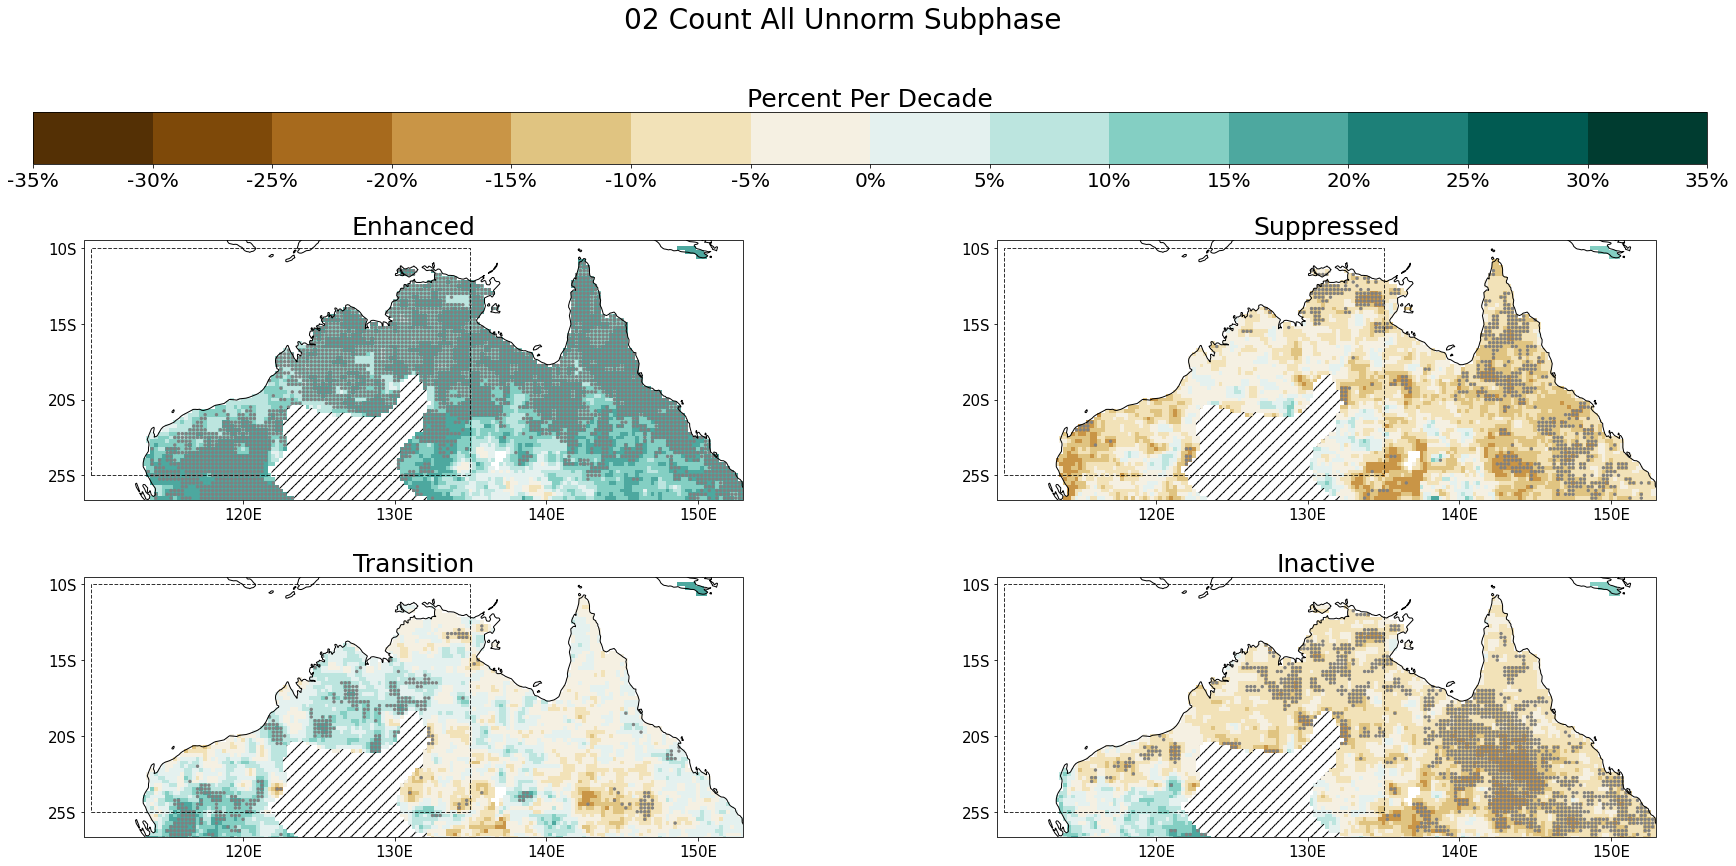

In [204]:
mapTrend.trend_plots(trend_percent_count_sub, stip_data = trend_percent_sig_count_sub,
               vmax = 35, step = 5, sig_size = 5.5, cmap = 'BrBG',
               title = '02_count_all_unnorm_subphase'+ ex_piece, colorbar_title = 'Percent Per Decade'
#                ,savedir = image_dir
               )

[-35 -30 -25 -20 -15 -10  -5   0   5  10  15  20  25  30  35]


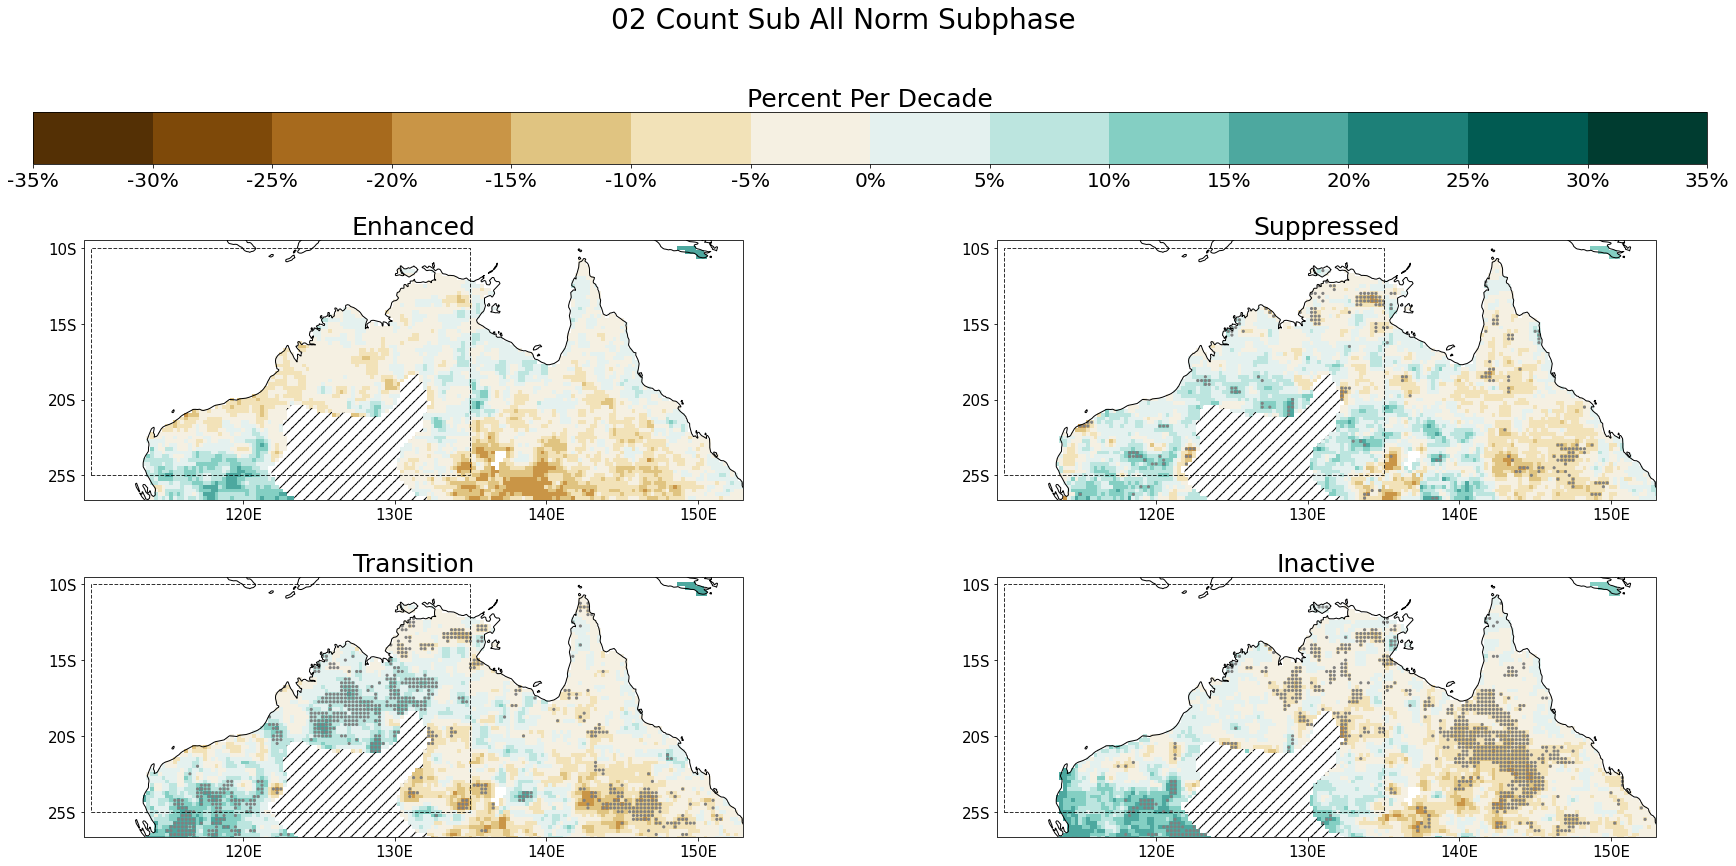

In [201]:
mapTrend.trend_plots(trend_percent_count_sub_norm, stip_data = trend_percent_sig_count_sub_norm,
               vmax = 35, step = 5, sig_size = 4.5, cmap = 'BrBG',
               title = '02_count_sub_all_norm_subphase'+ ex_piece, colorbar_title = 'Percent Per Decade'
#                ,savedir = image_dir
            )

[-35 -30 -25 -20 -15 -10  -5   0   5  10  15  20  25  30  35]


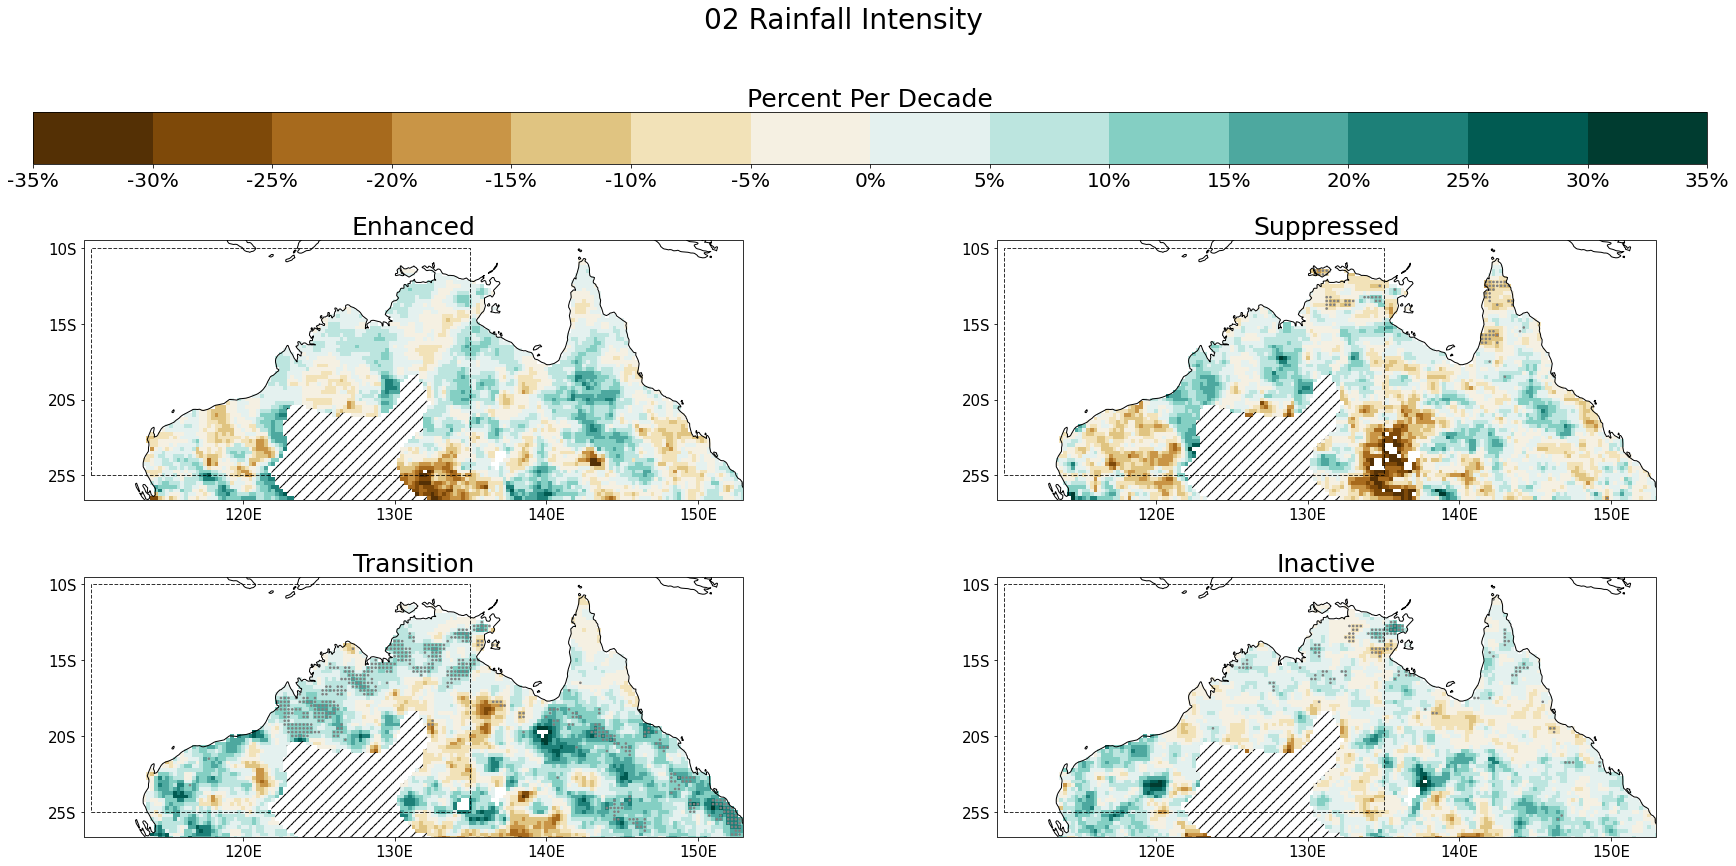

In [202]:
mapTrend.trend_plots(trend_percent_int_sub, stip_data = trend_percent_sig_int_sub, vmax = 35, step = 5,
                       title = '02_rainfall_intensity', colorbar_title = 'Percent Per Decade',
                       cmap = 'BrBG'
#                       ,savedir = image_dir
                       )

[-35 -30 -25 -20 -15 -10  -5   0   5  10  15  20  25  30  35]


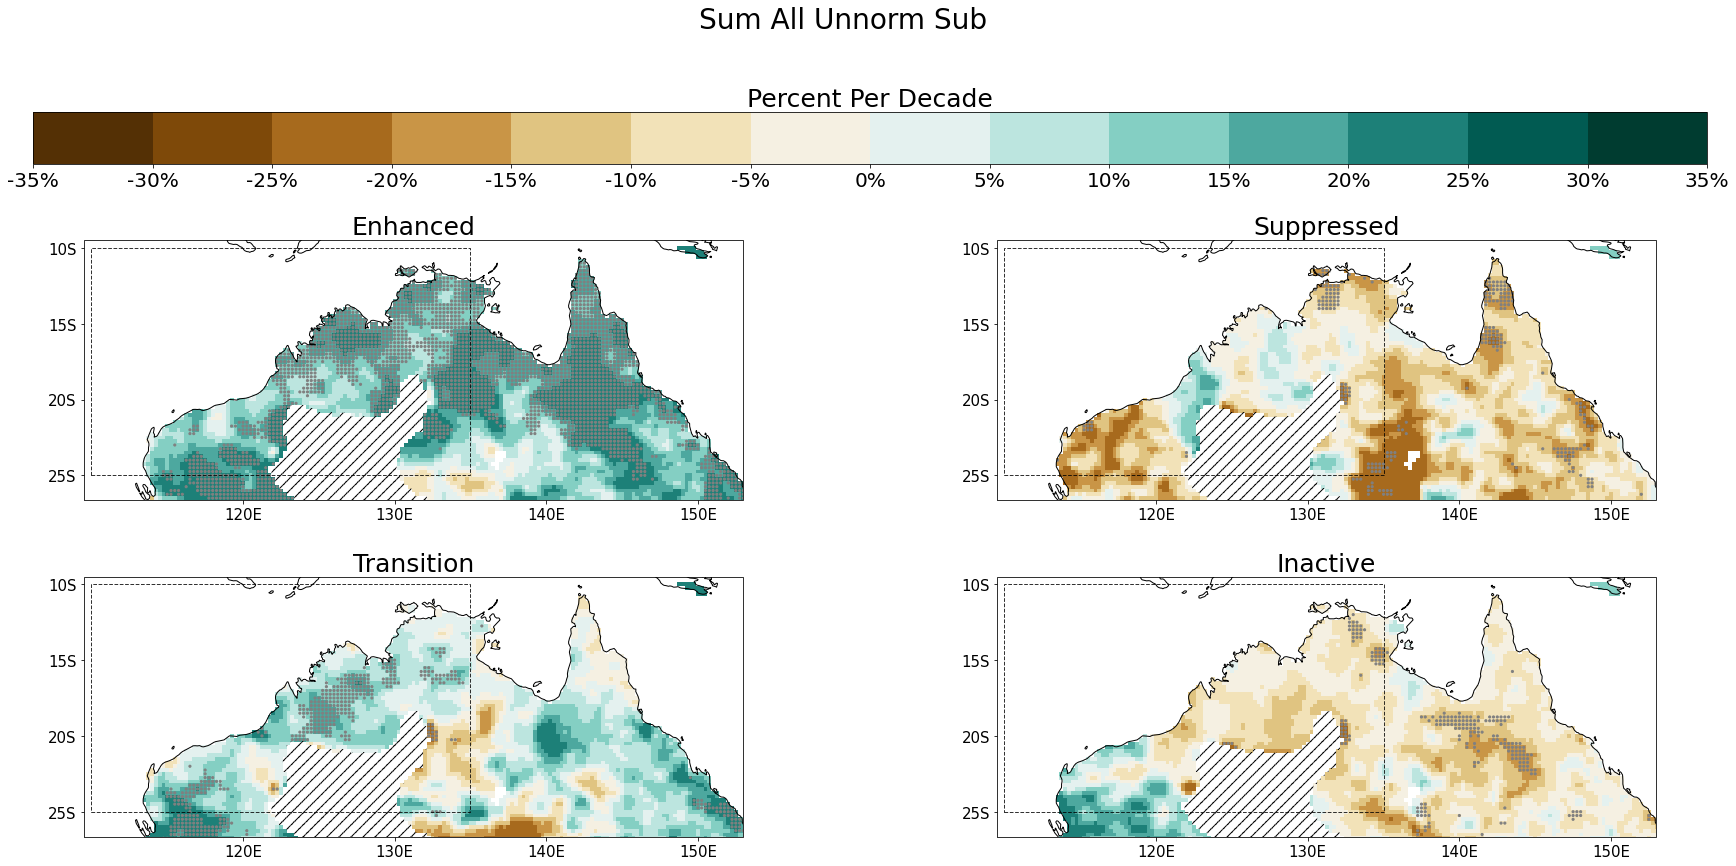

In [203]:
mapTrend.trend_plots(trend_percent_sum_sub, stip_data = trend_percent_sig_sum_sub,
                vmax = 35, step = 5, sig_size = 4.5, cmap = 'BrBG',
               title = 'sum_all_unnorm_sub'+ ex_piece, colorbar_title = 'Percent Per Decade',
#                savedir = savedir
               )

[-35 -30 -25 -20 -15 -10  -5   0   5  10  15  20  25  30  35]


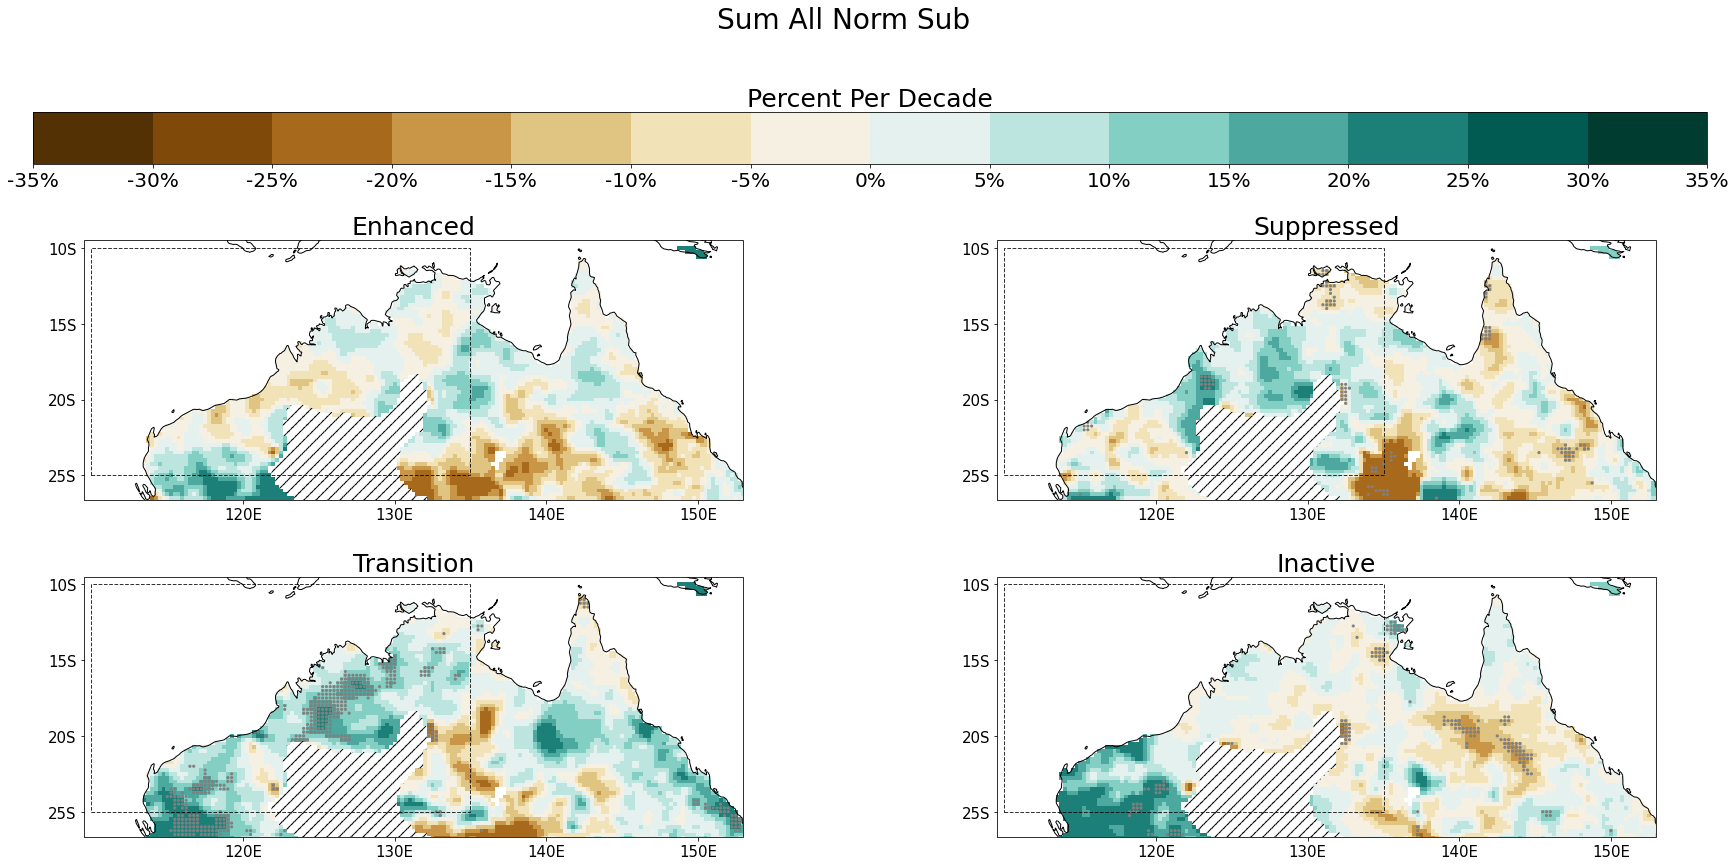

In [205]:
mapTrend.trend_plots(trend_percent_sum_sub_norm, stip_data = trend_percent_sig_sum_sub_norm,
               vmax = 35, step = 5, sig_size = 4.5, cmap = 'BrBG',
               title = 'sum_all_norm_sub'+ ex_piece, colorbar_title = 'Percent Per Decade',
#                savedir = savedir
               )

In [219]:
reload(mapTrend)

<module 'map_trend_functions' from '/home/563/ab2313/Documents/mjo_and_rainfall_trend/map_trend_functions.py'>

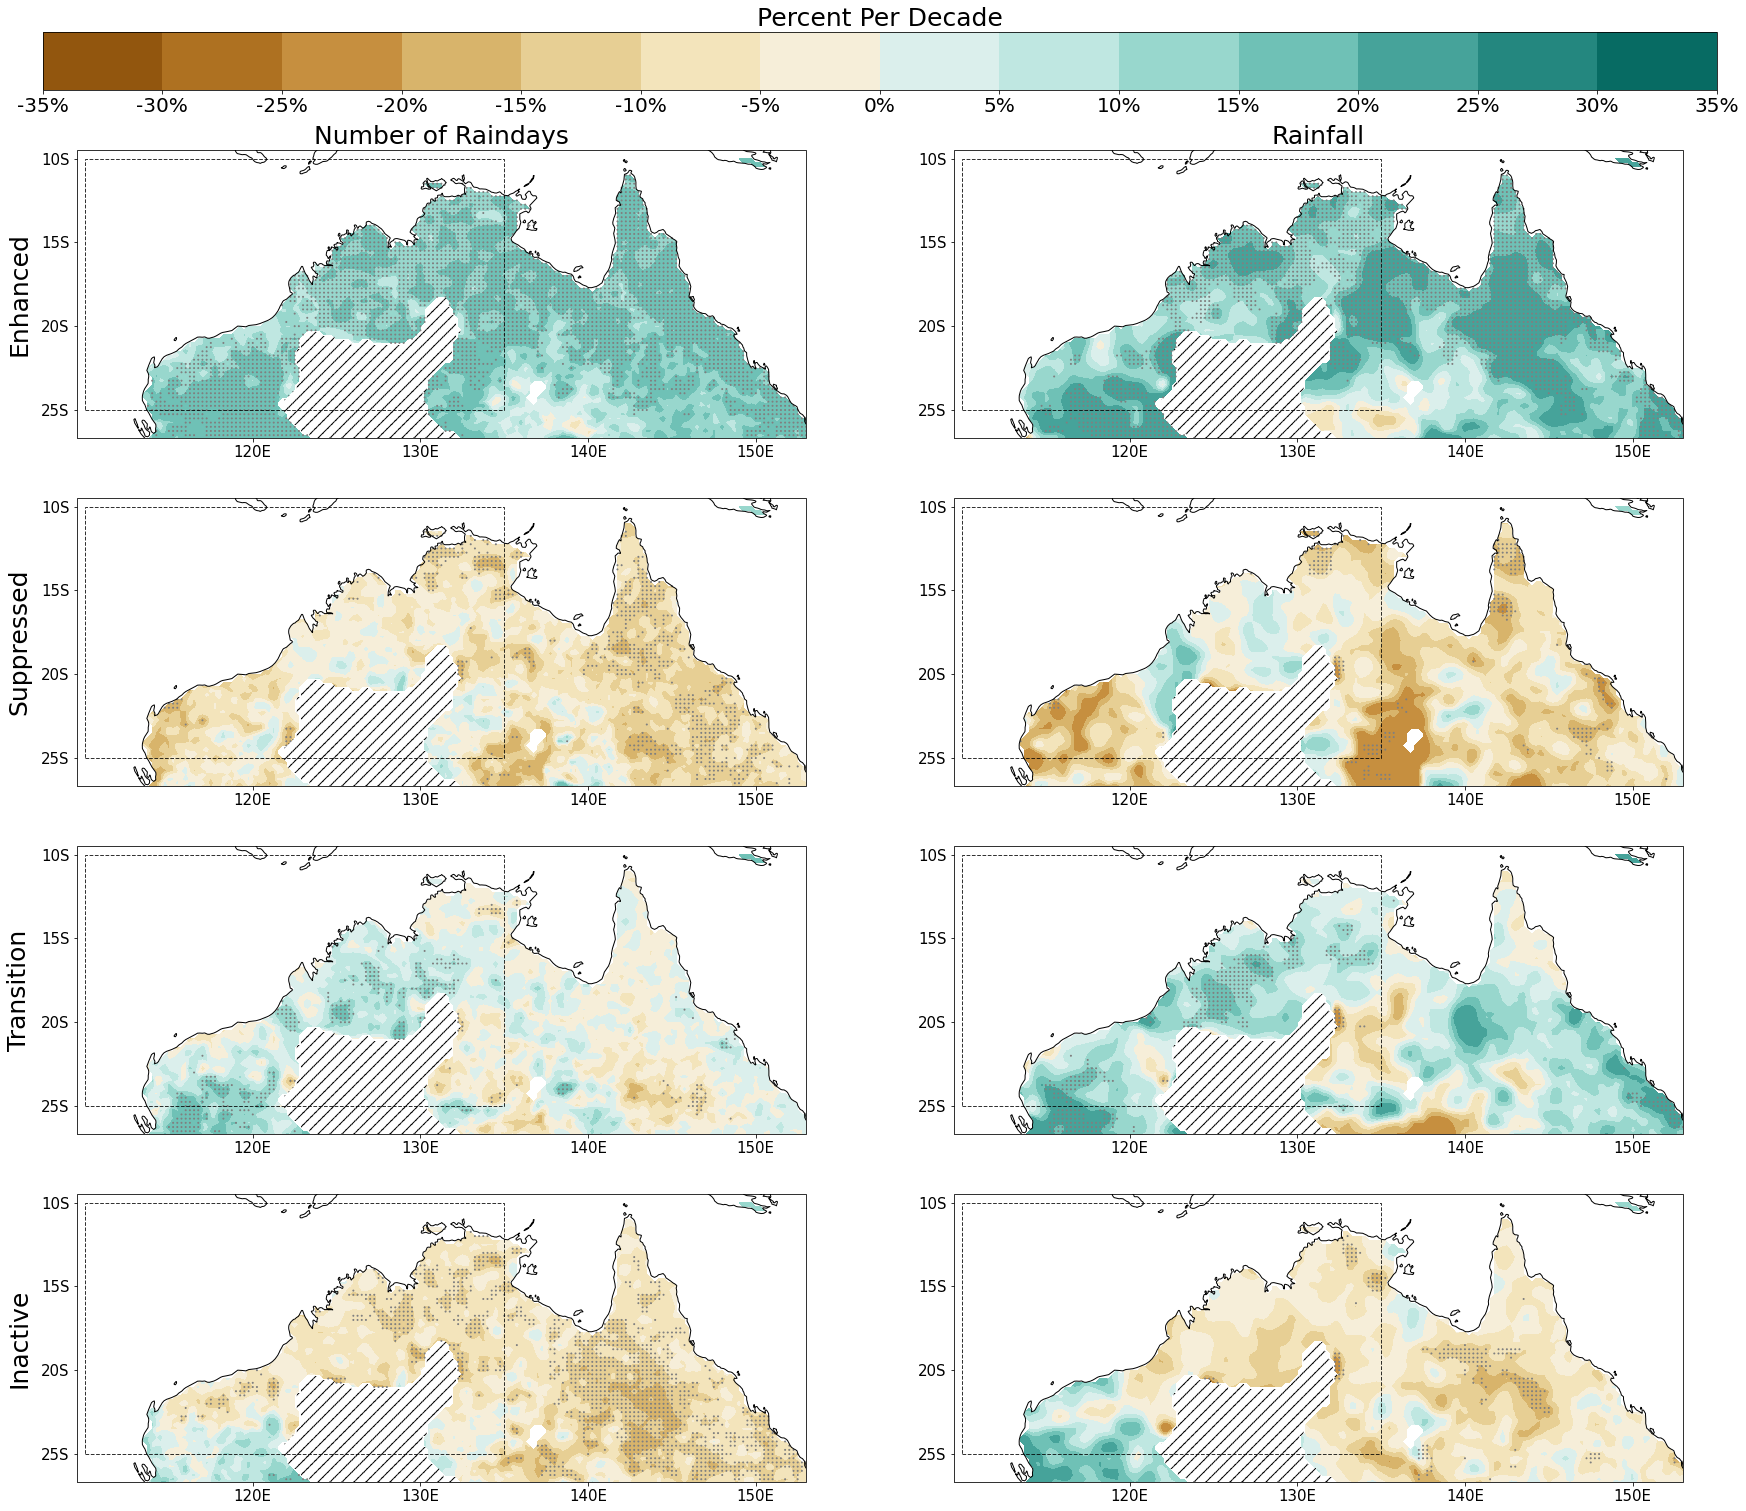

In [220]:
mapTrend.trend_plot_combined_better(merged_count_sum, stip_data = stip_count_sum, vmax = 35, step = 5,
                       title = 'merged_count_sum_BrBG', colorbar_title = 'Percent Per Decade',
                       cmap = 'BrBG'
#                       ,savedir = image_dir
                       )

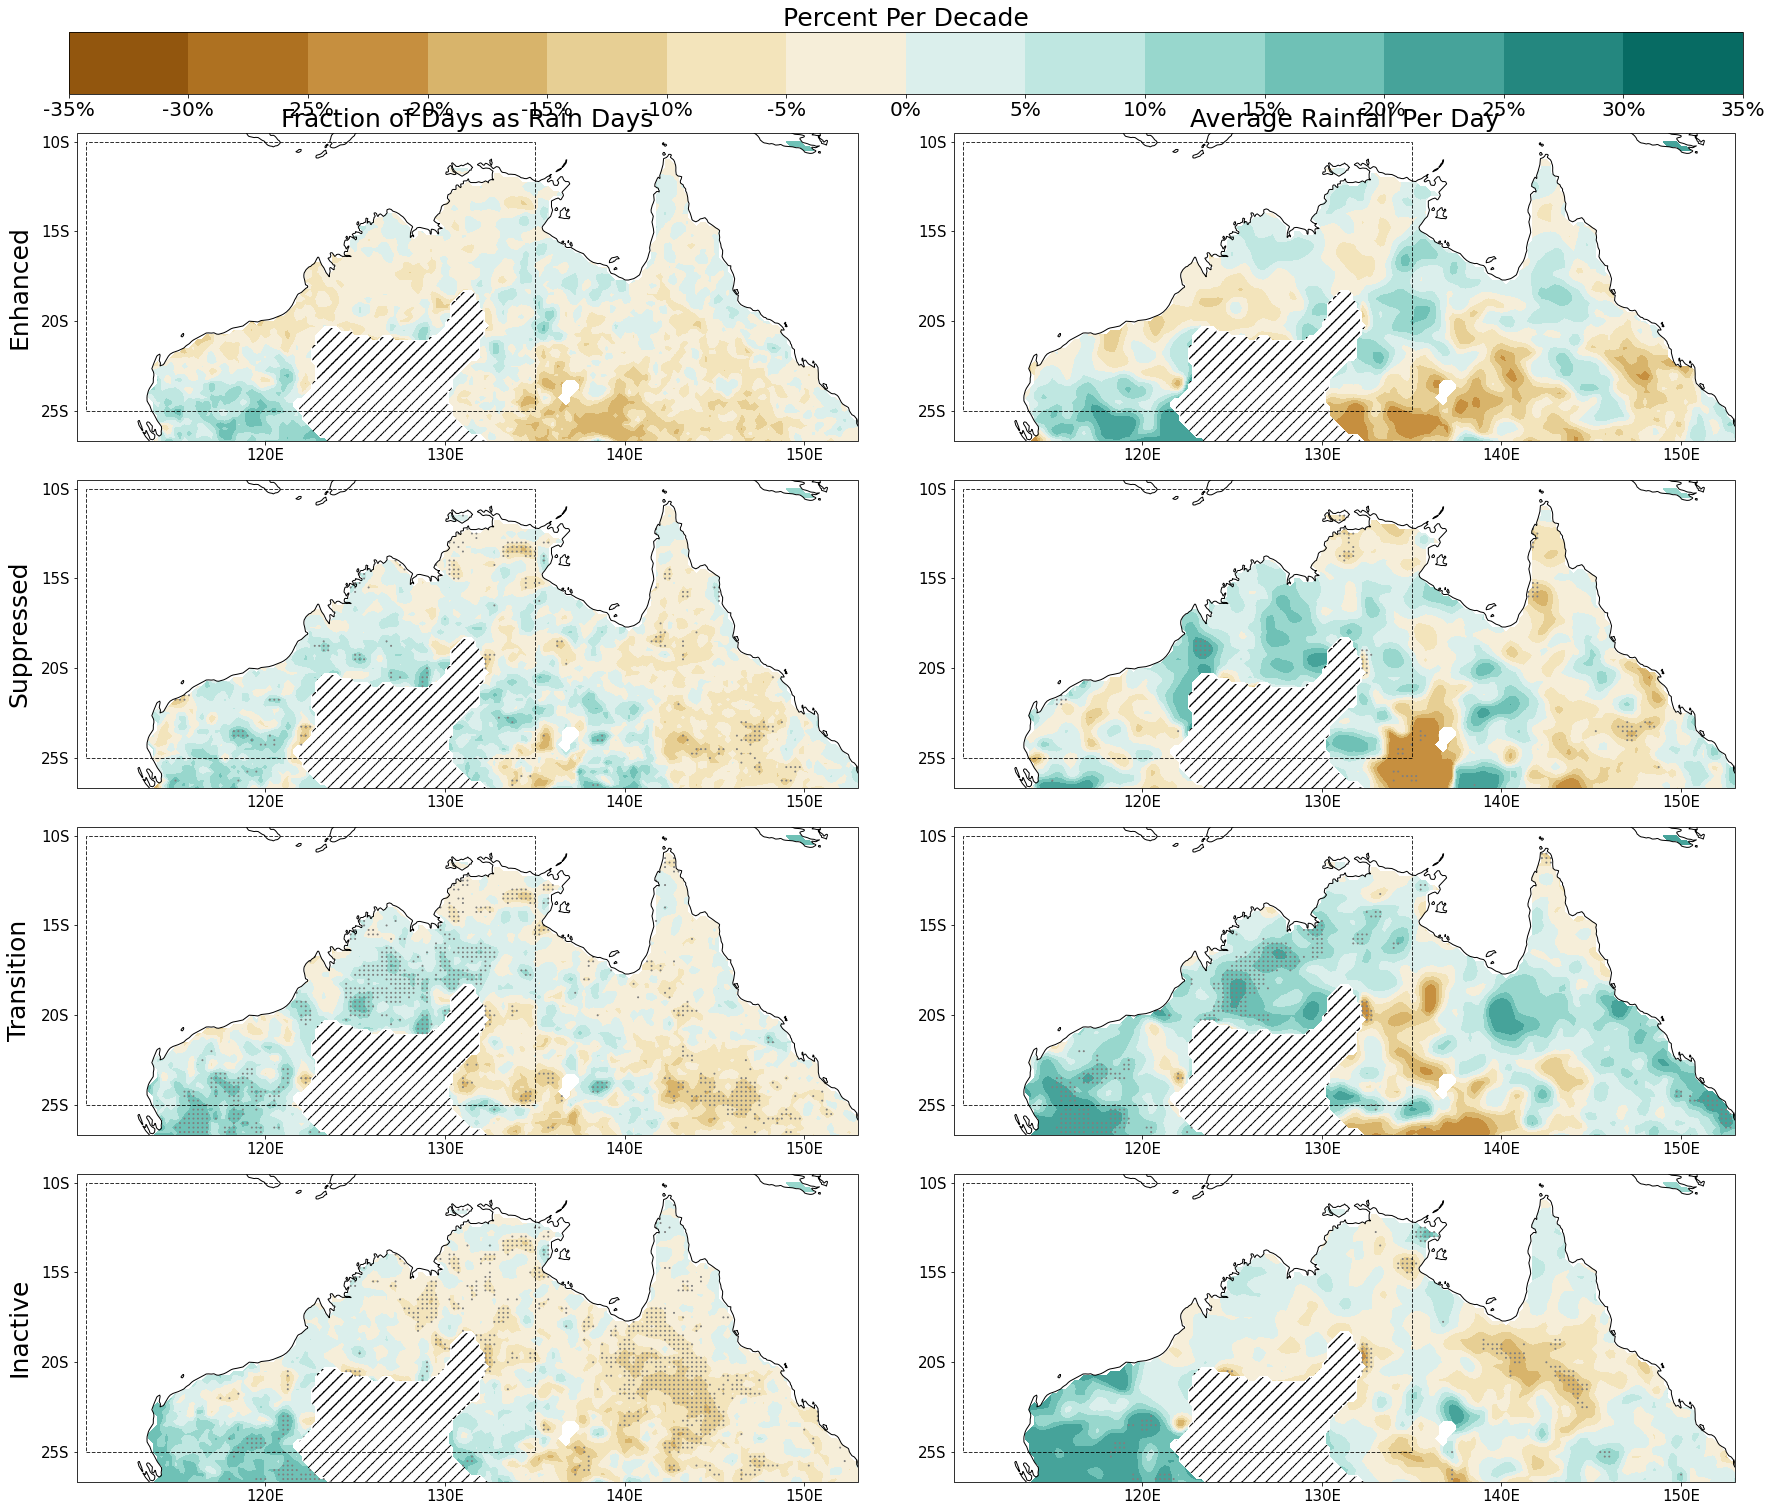

In [214]:
mapTrend.trend_plot_combined_better(merged_count_sum_norm , stip_data = stip_count_sum_norm ,
                                    vmax = 35, step = 5,
                       title = 'final_all_norm_01', colorbar_title = 'Percent Per Decade',
                        col_titles = ['Fraction of Days as Rain Days', 'Average Rainfall Per Day'],
                        cmap = 'BrBG'
#                        ,savedir = image_dir
                       )

# Fraction  of Total Trend

This code compares the fraction of the trend in the enhanced phase to the trend overall to get an estimate of the total trend.

## Total Trend Calc

In [174]:
years = np.unique(awap.time.dt.year.values)
years

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020])

From this we can see that there has been 47 years. However, the 2020 year is just the end of a wet season (or 1974 is just the start of a wet seaosn). So this is only 46 wet seasons.

In [175]:

# Moving the start of the wet season to the next year so the yearly resampling works.
# This means that 1975 is 1974/1975 and 2020 is 2019/2020
awap_ws = phase_calc.wet_season_year(awap)
rmm_ws = phase_calc.wet_season_year(rmm)

# Splitting AWAP into the the different phases of the Wheeler and Hendon MJO
awap_split_ws = phase_calc.split_into_1to8(awap_ws, rmm_ws)

In [176]:
print(len(np.unique(awap_split_ws.time.dt.year.values)[:23]), 
len(np.unique(awap_split_ws.time.dt.year.values)[23:]))

23 23


In [177]:
def count_resample(awap_data):
    # countring the rainfall events in each Wheeler and Hendon Phase
    awap_count = awap_data.resample(time = 'y').count(dim = 'time')
    awap_count['time'] = awap_count.time.dt.year
    awap_count = awap_count.rename({'time':'year', 'precip':'number'}) # to match the rmm count
    return awap_count

def sum_resample(awap_data):
    # sumring the rainfall events in each Wheeler and Hendon Phase
    awap_sum = awap_data.resample(time = 'y').sum(dim = 'time')
    awap_sum['time'] = awap_sum.time.dt.year
    awap_sum = awap_sum.rename({'time':'year', 'precip':'number'}) # to match the rmm sum
    return awap_sum

In [178]:
# The number of raindays each wet season.
awap_count = count_resample(awap_ws)

# The total amount of rainfall each wet season.
awap_sum = sum_resample(awap_ws)

In [179]:
# This is the raw trend, the data has not been normalised
phase_calc = reload(phase_calc)
trend_count, trend_sig_count, trend_percent_count, trend_percent_sig_count = \
    phase_calc.return_alltrendinfo_custom(awap_count.number)

# This is the raw trend, the data has not been normalised
phase_calc = reload(phase_calc)
trend_sum, trend_sig_sum, trend_percent_sum, trend_percent_sig_sum = \
    phase_calc.return_alltrendinfo_custom(awap_sum.number)

data
<xarray.DataArray 'number' (year: 51, lat: 81, lon: 173)>
array([[[  0,   0,   2, ...,  55,  56,  56],
        [  0,   1,   3, ...,  57,  55,  56],
        [  0,   2,   3, ...,  54,  58,  58],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   2, ...,  93, 100, 100],
        [  0,   1,   2, ...,  99, 102, 102],
        [  0,   2,   3, ...,  96, 102, 102],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,  78,  80,  79],
        [  0,   0,   0, ...,  78,  81,  82],
        [  0,   0,   0, ...,  78,  81,  82],
        ...,
...
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,  53,  55,  55],
        [  0,   1,  

## Percent of Trend due to MJO Calc

In [180]:
# The percent of the overall trend that is explained by the enhanced phase trend.
frac_count_exp = trend_count_sub.sel(phase = 'enhanced').squeeze() * 100/trend_count
frac_sum_exp = trend_sum_sub.sel(phase = 'enhanced').squeeze() * 100/trend_sum

In [181]:
frac_sum_exp

<xarray.DataArray (lat: 80, lon: 161)>
array([[   -0.        ,    -0.        ,    -0.        , ...,
         2152.2871299 ,     0.        ,     0.        ],
       [   -0.        ,    -0.        ,    -0.        , ...,
        -3647.72890958,   724.06870459,    -0.        ],
       [   -0.        ,    -0.        ,    -0.        , ...,
         -245.05918549,  -245.35429225,    -0.        ],
       ...,
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan]])
Coordinates:
  * lat      (lat) float64 -30.0 -29.75 -29.5 -29.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
    phase    <U8 'enhanced'

Text(0.01, 1.05, 'b)')

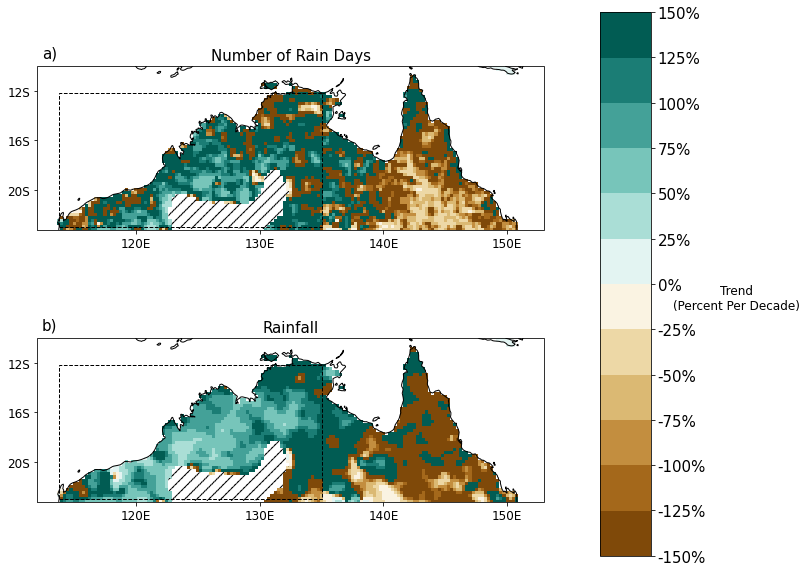

In [182]:
# fig  = plt.figure(figsize = (10,10))
# gs = gridspec.GridSpec(2,1, height_ratios = [0.1, 1], hspace = 0.1)
import plotting_functions as pf
pf = reload(pf)

fig, gs = pf.fig_formatter(height_ratios = [1,1], width_ratios = [1, 0.1], hspace = 0.0, wspace = 0.2)


vmax = 150
vmin = -vmax
step = 25
cmapi = 'BrBG'
# cmapi = 'Blues'


cmap, levels = pf.colorbar_creater(vmax, step, cmap = cmapi,vmin = vmin, add_white = 1,extender = 1)

ax = fig.add_subplot(gs[0,0], projection = ccrs.PlateCarree())
plot = pf.map_plot_with_no_controurf_NWASquare(
                            max_filter(frac_count_exp, vmax), 
                            ax, cmap, levels, square = 1)
ax.set_title('Number of Rain Days', size = 15);
ax.annotate('a)', xy = (0.01,1.05), xycoords = 'axes fraction', size = 15)


cax = plt.subplot(gs[:,1])
ticks = np.core.defchararray.add(levels.astype(str)  , np.tile('%',len(levels)))
pf.create_colorbar(plot, cax, levels, 
                   ticks = ticks,
                   cbar_title =  "Trend\n(Percent Per Decade)",
                  cbar_titleSize = 12, orientation = 'vertical', rotation = 0)



ax = fig.add_subplot(gs[1,0], projection = ccrs.PlateCarree())
plot = pf.map_plot_with_no_controurf_NWASquare(
    max_filter(frac_sum_exp, vmax), 
                            ax, cmap, levels, square = 1)

ax.set_title('Rainfall', size = 15);
ax.annotate('b)', xy = (0.01,1.05), xycoords = 'axes fraction', size = 15)


# fig.savefig('../images/mjo_and_rainfall_trend_images/percent_contribution_BrBG_extended.png', dpi = 600
#            ,bbox_inches = 'tight', pad = 0)

# PDF's

In [183]:
def plot_hist(ax, data, phase, xmax = 700, start=5, step = 1, title = '', xlabel = '', 
             zorder = [0, 1]):
    
    
    green = '#44a198'
    brown = '#c38e3f'#'#dbb973'
    # Subsetting data.
    dist1 = data.isel(year = slice(None,23)).sel(
        phase = phase,lon = slice(110, 135), lat = slice(-25,-10)).precip.values.flatten()
    dist2 = data.isel(year = slice(23,None)).sel(
        phase = phase,lon = slice(110, 135), lat = slice(-25,-10)).precip.values.flatten()
    # Bins
    bins = np.arange(start, xmax, step)
    # First data slice
    hist_dat1 = ax.hist(dist1, bins = bins, color = brown,
            alpha = 0.7, zorder = zorder[0], label = '1974/75 to 1996/97 '
    #         , density = True
            );
    # Second data slice
    hist_dat2 = ax.hist(dist2, bins = bins, 
             color = green,alpha = 0.6,zorder = zorder[1], label = '1997/98 to 2019/20'
    #         , density = True
            );
    # Xlims
    ax.set_xlim(start,xmax)
    # Legend
    leg = ax.legend(fontsize = 12)
    #Spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # Labels
    ax.set_ylabel('Frequency', size = 15);
    ax.set_xlabel(xlabel, size = 15);
    ax.set_title(title, size = 18);
    ax.tick_params(axis='y', labelsize=12)
    ax.tick_params(axis='x', labelsize=12)
    
    return hist_dat1, hist_dat2

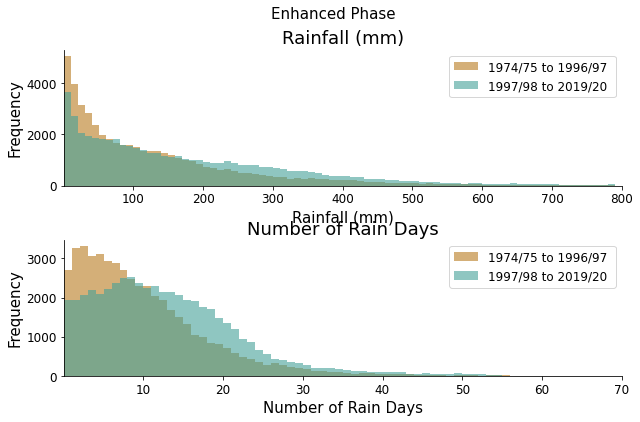

In [184]:
fig = plt.figure(figsize = (10,6))
gs = gridspec.GridSpec(2,1, hspace = 0.4)
phase = 'enhanced'

ax1 = fig.add_subplot(gs[0])
sum_dat1, sum_dat2 = plot_hist(ax1,awap_sum_sub, phase, xmax = 800, step = 10, start=.001,
          title = 'Rainfall (mm)', xlabel = 'Rainfall (mm)')

ax2 = fig.add_subplot(gs[1])
count_dat1, count_dat2 = plot_hist(ax2,awap_count_sub, phase,xmax = 70, step = 1, start=.001,
          title = 'Number of Rain Days', xlabel = 'Number of Rain Days')

fig.suptitle('{} Phase'.format(phase.capitalize()), fontsize = 15);
# fig.savefig('../images/mjo_and_rainfall_trend_images/rainfall_enhanced_phase_pdf_BrBG.png', dpi = 600)

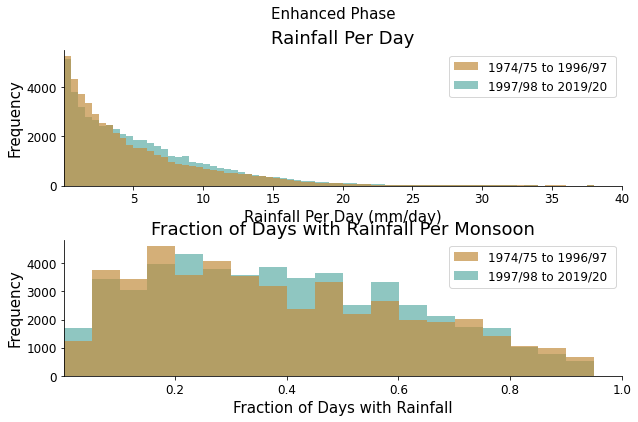

In [185]:
fig = plt.figure(figsize = (10,6))
gs = gridspec.GridSpec(2,1, hspace = 0.4)
phase = 'enhanced'

ax1 = fig.add_subplot(gs[0])
sum_dat1, sum_dat2 = plot_hist(ax1, awap_sum_sub_norm, phase, xmax = 40, step = 0.5, start=0.001,
          title =  'Rainfall Per Day', xlabel =  'Rainfall Per Day (mm/day)', 
                              zorder = [1,0])

ax2 = fig.add_subplot(gs[1])
count_dat1, count_dat2 = plot_hist(ax2, awap_count_sub_norm, phase, start=0.001, xmax = 1, step = .05,
          title ='Fraction of Days with Rainfall Per Monsoon', 
                                   xlabel ='Fraction of Days with Rainfall', zorder = [1,0])

fig.suptitle('{} Phase'.format(phase.capitalize()), fontsize = 15);
# fig.savefig('../images/mjo_and_rainfall_trend_images/rainfall_enhanced_phase_pdf_BrBG.png', dpi = 600)

0 count (80, 161) (80, 161) (80, 161)
1 sum (80, 161) (80, 161) (80, 161)


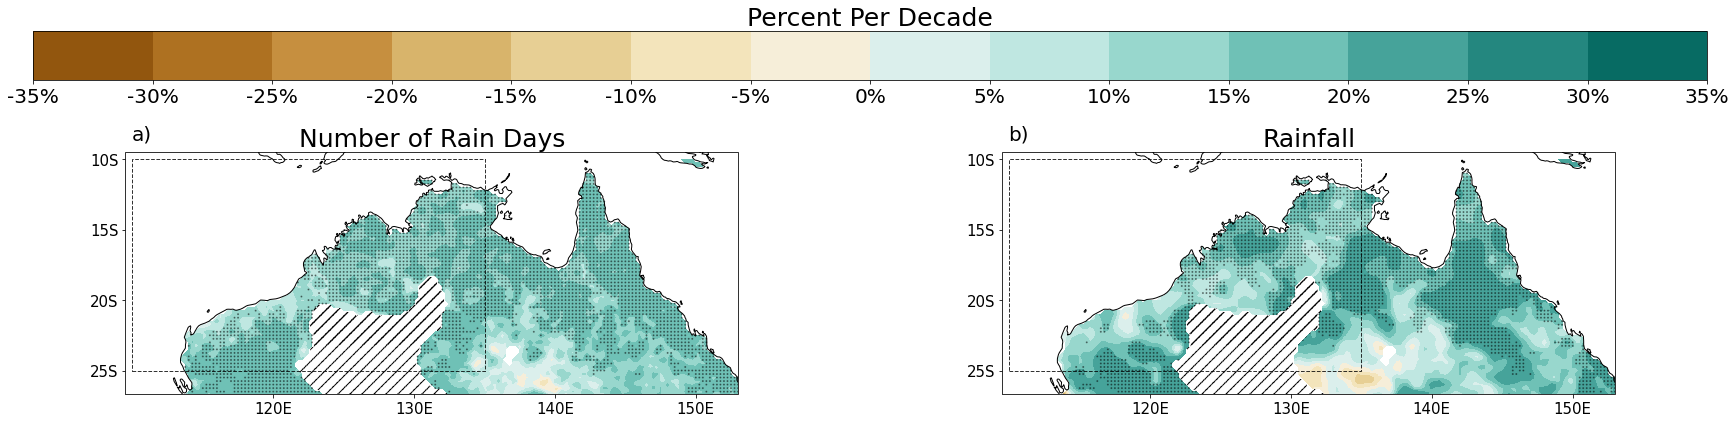

In [186]:
reload(mapTrend)

mapTrend.trend_plot_combined_single_phase(merged_count_sum.sel(phase = 'enhanced'),
                             stip_data = stip_count_sum.sel(phase = 'enhanced'), vmax = 35, step = 5,
                       title = 'merged_count_sum_enhanced_BrBG_extended', colorbar_title = 'Percent Per Decade',
                                    phase = 'enhanced', cmap = 'BrBG'
#                        ,savedir = image_dir
                       )

In [187]:
def create_map_and_distribution_plot(map_ds, map_stip_ds, count_ds, sum_ds, dist1_params, dist2_params,
                                    vmax=30, step=5, phase='enhanced', 
                                     ):
    
    title_size = 22
    annotate_size = 18
    ticklabel_size = 12
    cbar_title_size = 15
    vmin = -vmax
    cmapi = 'BrBG'
    
    fig, gs = pf.fig_formatter(height_ratios = [1,.8,1,.8], width_ratios = [1, .05], 
                               hspace = 0.4, wspace = 0.1)



    cmap, levels = pf.colorbar_creater(vmax, step, cmap = cmapi,vmin = vmin, add_white = 1,extender = 1)


    ### Number of Raindays
    ax = fig.add_subplot(gs[0,0], projection = ccrs.PlateCarree())

    # ax, data, cmap, levels, stip_data = None
    plot = mapTrend.trend_plot_single(ax,
                                map_ds.sel(phase = phase)['count'],
                              cmap, levels, stip_data = map_stip_ds.sel(phase = phase)['count'])
    ax.set_title('Number of Rain Days', size = title_size);
    ax.annotate('a)', xy = (0.01,1.05), xycoords = 'axes fraction', size = annotate_size)


    cax = plt.subplot(gs[0,1])
    ticks = np.core.defchararray.add(levels.astype(str)  , np.tile('%',len(levels)))
    pf.create_colorbar(plot, cax, levels, 
                       ticks = ticks[::2]
                    ,cbar_title =  "Trend\n(Percent Per Decade)",
                       xtickSize= ticklabel_size, cbar_titleSize = cbar_title_size,
                       orientation = 'vertical', rotation = 0, 
                      labelpad=3, cut_ticks = 2, title_rotation=90)
                      #cbar_titleSize = 12, orientation = 'vertical', rotation = 0, cut_ticks = 2)


    ###### Total Rainfall
    ax = fig.add_subplot(gs[2,0], projection = ccrs.PlateCarree())
    plot = mapTrend.trend_plot_single(ax,
                    map_ds.sel(phase = phase)['sum'],
                  cmap, levels, stip_data = map_stip_ds.sel(phase = phase)['sum'])

    ax.set_title('Rainfall', size = title_size);
    ax.annotate('c)', xy = (0.01,1.05), xycoords = 'axes fraction', size = annotate_size)


    cax = plt.subplot(gs[2,1])
    ticks = np.core.defchararray.add(levels.astype(str) , np.tile('%',len(levels)))
    pf.create_colorbar(plot, cax, levels, 
                       ticks = ticks[::2]
                       ,cbar_title =  "Trend\n(Percent Per Decade)",
                       xtickSize= ticklabel_size, cbar_titleSize = cbar_title_size, orientation = 'vertical', rotation = 0, 
                      labelpad=3, cut_ticks = 2, title_rotation=90)
                      #cbar_titleSize = 18, orientation = 'vertical', rotation = 0 , cut_ticks = 2)


    #### Adding in PDF's

    ax2 = fig.add_subplot(gs[1,0])
    count_dat1, count_dat2 = plot_hist(ax2,count_ds, phase, **dist1_params, title = '')
    ax2.annotate('b)', xy = (0.01,1.05), xycoords = 'axes fraction', size = annotate_size)
    ax2.tick_params(axis='x', labelsize=ticklabel_size)
    ax2.tick_params(axis='y', labelsize=ticklabel_size)



    ax1 = fig.add_subplot(gs[3,0])
    sum_dat1, sum_dat2 = plot_hist(ax1,sum_ds, phase, **dist2_params, title = '')
    ax1.annotate('d)', xy = (0.01,1.05), xycoords = 'axes fraction', size = annotate_size);
    ax1.tick_params(axis='x', labelsize=ticklabel_size)
    ax1.tick_params(axis='y', labelsize=ticklabel_size)
    
    return fig

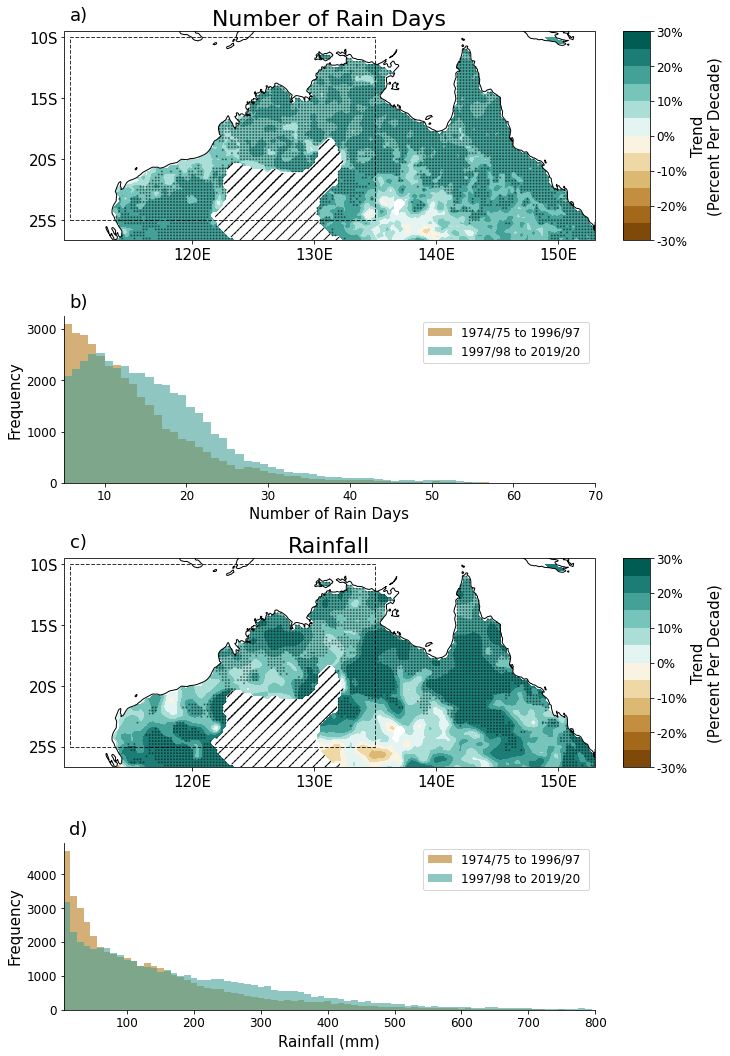

In [190]:
fig = create_map_and_distribution_plot(merged_count_sum, stip_count_sum, 
                                awap_count_sub, awap_sum_sub,
                                      dist1_params = dict(xmax=70, step=1, xlabel='Number of Rain Days'),
                                      dist2_params = {'xmax':800, 'step':10, 'xlabel':'Rainfall (mm)'})

fig.savefig(os.path.join(constants.IMAGE_SAVE_DIR,'percent_trend_and_pdf_ordered_extended_longer_time.png'),
            dpi = 600 ,bbox_inches = 'tight', pad = 0)

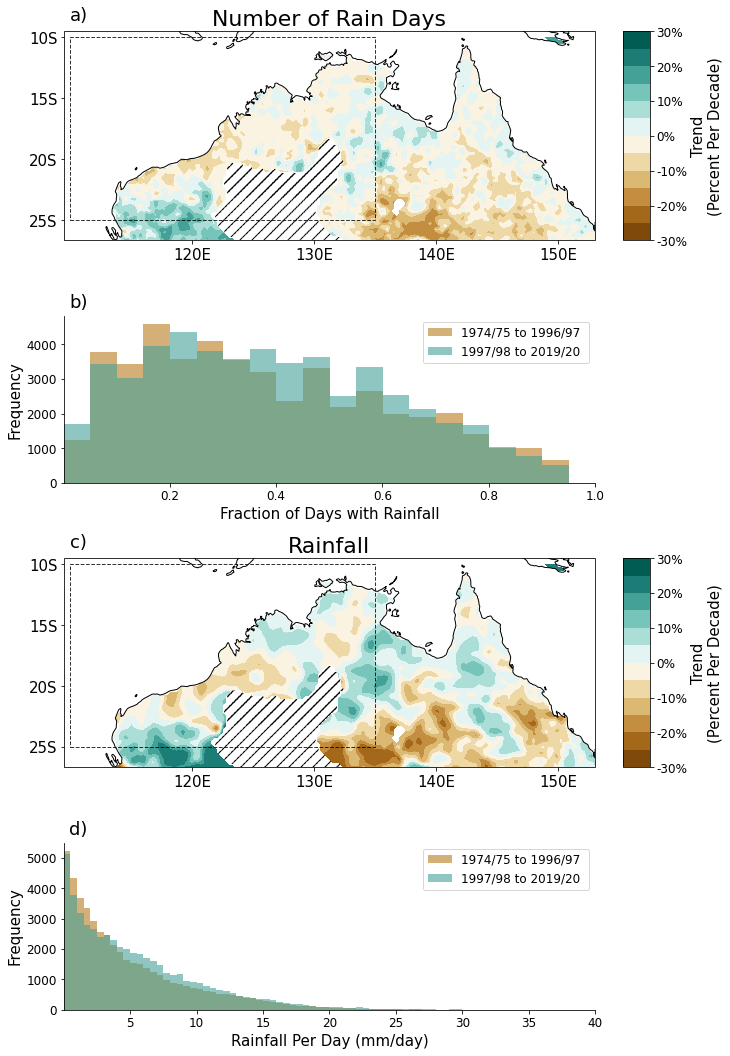

In [191]:
fig = create_map_and_distribution_plot(merged_count_sum_norm, stip_count_sum_norm, 
                                       awap_count_sub_norm, awap_sum_sub_norm, 
                                      dist1_params = dict(start=0.001, xmax = 1, step = .05,
                                                          xlabel ='Fraction of Days with Rainfall'),
                                      dist2_params = dict(xmax = 40, step = 0.5, start=0.001,
                                                          xlabel =  'Rainfall Per Day (mm/day)'),
)
fig.savefig(os.path.join(constants.IMAGE_SAVE_DIR, 'normlaised_map_and_dist_plot.png'), dpi = 600
           ,bbox_inches = 'tight', pad = 0)